#### Author: Mustafa Radheyyan
#### Date: 04/10/2023
#### Assignment: Cognixia JUMPlus Python Project 2
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

## 1. Import required libraries

Imports and Constants

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.ticker as ticker

Path of data source

In [29]:
MARVEL_HEROES_CSV_PATH = 'charcters_stats.csv'

Context Manager helper functions for displaying DataFrames differently than the default configuration settings

In [30]:
def force_show_all_columns(df):
    with pd.option_context('display.max_columns', None, 'display.width', None):
        display(df)

In [31]:
def force_show_all_rows(df):
    with pd.option_context('display.max_rows', None, 'display.width', None):
        display(df)

In [32]:
def force_show_max_width(df):
    with pd.option_context('display.max_colwidth', None, 'display.width', None):
        display(df)

## 2. Read the csv
#### (Load the csv file)

One of the names is duplicated in the dataset (Nova).

I read the CSV with the 'Name' column as the index column because it is mostly unique

In [33]:
marvel_heroes_df = pd.read_csv(MARVEL_HEROES_CSV_PATH)
print(f"The number of unique names is: {len(marvel_heroes_df.Name.unique())}, compared to the number of rows total: {len(marvel_heroes_df)}")
marvel_duplicate = marvel_heroes_df[marvel_heroes_df.duplicated(subset=["Name"], keep=False)]

marvel_heroes_df = pd.read_csv(MARVEL_HEROES_CSV_PATH, index_col='Name')
marvel_heroes_df = marvel_heroes_df.reset_index().drop_duplicates(subset=['Name']).set_index('Name')
marvel_heroes_df.loc["Nova"].to_frame().transpose()

marvel_heroes_df = pd.read_csv(MARVEL_HEROES_CSV_PATH, index_col='Name')

The number of unique names is: 610, compared to the number of rows total: 611


## Data Cleaning

##### Get DF Column List and Name Column (Index)

Made DataFrame's columns lowercase in order to be more computing friendly<br></br>
Made a list of the dataframe's columns to enable easier searching of column names

In [34]:
marvel_heroes_df.columns = marvel_heroes_df.columns.str.lower()
marvel_heroes_df.index.name = marvel_heroes_df.index.name.lower()
marvel_hero_columns = list(marvel_heroes_df.reset_index().columns)
marvel_hero_columns

['name',
 'alignment',
 'intelligence',
 'strength',
 'speed',
 'durability',
 'power',
 'combat',
 'total']

Set the name column into a variable

In [35]:
columns_with_name_string = [column for column in marvel_hero_columns if "name" in column]
print(columns_with_name_string)
name_column = columns_with_name_string[0]

['name']


##### Correct spelling error(s)

In [37]:
marvel_heroes_df = marvel_heroes_df.rename(index={'Super Moos': 'Super Moose'})

#### Make separate DataFrame for non-outlier data

In [38]:
marvel_heroes_df.loc[marvel_heroes_df["total"] <= 5]

alignment  intelligence  strength  speed  durability  power   
name                                                                           
Adam Strange          good             1         1      1           1      0  \
Agent  13             good             1         1      1           1      0   
Alex Woolsly          good             1         1      1           1      0   
Allan Quatermain      good             1         1      1           1      0   
Ammo                   bad             1         1      1           1      0   
...                    ...           ...       ...    ...         ...    ...   
Weapon XI              bad             1         1      1           1      0   
White Queen           good             1         1      1           1      0   
Wiz Kid               good             1         1      1           1      0   
Wondra                good             1         1      1           1      0   
Yellow Claw            bad             1         1      1           1      0   

                  combat  total  
name                             
Adam Strange           1      5  
Agent  13              1      5  
Alex Woolsly           1      5  
Allan Quatermain       1      5  
Ammo                   1      5  
...                  ...    ...  
Weapon XI              1      5  
White Queen            1      5  
Wiz Kid                1      5  
Wondra                 1      5  
Yellow Claw            1      5  

[177 rows x 8 columns]

In [39]:
marvel_heroes_df.loc[marvel_heroes_df['total'] == 5].value_counts()

alignment  intelligence  strength  speed  durability  power  combat  total
good       1             1         1      1           0      1       5        133
bad        1             1         1      1           0      1       5         43
Name: count, dtype: int64

In [40]:
marvel_heroes_df.loc[(marvel_heroes_df['total'] == 5) & (marvel_heroes_df['power'] != 0)]

Empty DataFrame
Columns: [alignment, intelligence, strength, speed, durability, power, combat, total]
Index: []

In [41]:
marvel_heroes_df.loc[(marvel_heroes_df['power'] == 0) & (marvel_heroes_df['total'] != 5)]

alignment  intelligence  strength  speed  durability  power   
name                                                                         
Doctor Doom II       bad             1        32      1           1      0  \
Franklin Storm      good            38        10      1           1      0   

                combat  total  
name                           
Doctor Doom II       1     36  
Franklin Storm      10     60

In [42]:
df_without_total_5_rows = marvel_heroes_df.loc[marvel_heroes_df["total"] > 5]
df_without_total_5_rows

alignment  intelligence  strength  speed  durability  power   
name                                                                          
3-D Man              good            50        31     43          32     25  \
A-Bomb               good            38       100     17          80     17   
Abe Sapien           good            88        14     35          42     35   
Abin Sur             good            50        90     53          64     84   
Abomination           bad            63        80     53          90     55   
...                   ...           ...       ...    ...         ...    ...   
Yellowjacket         good            88        10     12          28     12   
Yellowjacket II      good            50        10     35          28     31   
Ymir                 good            50       100     27         100     83   
Zatanna              good            75        10     23          28    100   
Zoom                  bad            50        10    100          28     72   

                 combat  total  
name                            
3-D Man              52    233  
A-Bomb               64    316  
Abe Sapien           85    299  
Abin Sur             65    406  
Abomination          95    436  
...                 ...    ...  
Yellowjacket         14    164  
Yellowjacket II      28    182  
Ymir                 28    388  
Zatanna              56    292  
Zoom                 28    288  

[434 rows x 8 columns]

Saving output to CSV for simple Tableau support

In [43]:
df_without_total_5_rows.to_csv('character_stats_clean.csv')

Saving output to Parquet for storage and speed optimization

In [44]:
df_without_total_5_rows.to_parquet('character_stats_clean.parquet')

## 3. Show the first record from the csv
#### (show first 5 records from it)

The head function displays 5 rows by default

In [45]:
marvel_heroes_df.head()

alignment  intelligence  strength  speed  durability  power   
name                                                                      
3-D Man          good            50        31     43          32     25  \
A-Bomb           good            38       100     17          80     17   
Abe Sapien       good            88        14     35          42     35   
Abin Sur         good            50        90     53          64     84   
Abomination       bad            63        80     53          90     55   

             combat  total  
name                        
3-D Man          52    233  
A-Bomb           64    316  
Abe Sapien       85    299  
Abin Sur         65    406  
Abomination      95    436

## 4. Show the number of rows and columns

The shape function returns a tuple in which the first index is the number of rows of the Dataframe and the second index is the number of columns

In [46]:
rows_columns = marvel_heroes_df.shape
rows, columns = rows_columns[0], rows_columns[1]
print(f"The number of rows is {rows} and the number of columns is {columns}.")

The number of rows is 611 and the number of columns is 8.


## 5. Find the amount of characters who fall under each alignment, you can use value_counts()

Set the alignment column into a variable

In [47]:
columns_with_alignment_string = [column for column in marvel_hero_columns if "alignment" in column]
print(columns_with_alignment_string)
alignment_column = columns_with_alignment_string[0]

['alignment']


Found the counts of the alignment column, in which the 'good' value has the highest number of rows, and 'neutral' has the lowest

In [48]:
marvel_heroes_df[alignment_column].unique()
marvel_heroes_df[alignment_column].value_counts()

alignment
good       432
bad        165
neutral     11
Name: count, dtype: int64

## 6. Find only the good alignment characters

Return a subset of the dataframe where the alignment column's value is equal to "good"

In [49]:
good_alignment_heroes = marvel_heroes_df.loc[marvel_heroes_df[alignment_column] == 'good']

In [50]:
# force_show_all_rows(good_alignment_heroes)

## 7. Show only the first five records from the previous bullet point
#### (First five records found in point 6)

Use previously defined variable with head function with default parameter values

In [51]:
good_alignment_heroes.head()

alignment  intelligence  strength  speed  durability  power   
name                                                                      
3-D Man          good            50        31     43          32     25  \
A-Bomb           good            38       100     17          80     17   
Abe Sapien       good            88        14     35          42     35   
Abin Sur         good            50        90     53          64     84   
Adam Monroe      good            63        10     12         100     71   

             combat  total  
name                        
3-D Man          52    233  
A-Bomb           64    316  
Abe Sapien       85    299  
Abin Sur         65    406  
Adam Monroe      64    320

## 8. Select the top five heroes with the highest speed who have a good alignment

Set the speed column into a variable

In [52]:
columns_with_speed_string = [column for column in marvel_hero_columns if "speed" in column]
print(columns_with_speed_string)
speed_column = columns_with_speed_string[0]

['speed']


Use the nlargest function to get the five largest rows based on the value of the "speed" column

In [53]:
good_alignment_heroes.nlargest(5, speed_column)

alignment  intelligence  strength  speed  durability  power   
name                                                                     
Black Bolt      good            75        67    100          84    100  \
Flash I         good            63        10    100          50     57   
Flash II        good            63        10    100          60     66   
Flash III       good            63        10    100          60     83   
Flash IV        good            63        10    100          32     59   

            combat  total  
name                       
Black Bolt      56    482  
Flash I         32    312  
Flash II        32    331  
Flash III       32    348  
Flash IV        48    312

## 9. Select five heroes with maximum power who have a good alignment

Set the power column into a variable

In [54]:
columns_with_power_string = [column for column in marvel_hero_columns if "power" in column]
print(columns_with_power_string)
power_column = columns_with_power_string[0]

['power']


Use the nlargest function to get the five largest rows based on the value of the "power" column

In [55]:
first_five_records_max_power_heroes = good_alignment_heroes.nlargest(5, power_column)
first_five_records_max_power_heroes

alignment  intelligence  strength  speed  durability  power   
name                                                                        
Beta Ray Bill      good            63        80     35          95    100  \
Beyonder           good            88       100     23         100    100   
Black Bolt         good            75        67    100          84    100   
Cable              good            88        48     23          56    100   
Deadman            good            50        10     33         100    100   

               combat  total  
name                          
Beta Ray Bill      84    457  
Beyonder           56    467  
Black Bolt         56    482  
Cable              80    395  
Deadman            42    335

## 10. Find out how many super heroes are there with power 100 of good alignment

Use the loc function to find the dataframe subset in which the values of the "power" column are equal to 100

In [56]:
heroes_with_power_100_query = good_alignment_heroes.loc[good_alignment_heroes[power_column] == 100]

number_of_heroes_with_power_100 = len(heroes_with_power_100_query)
print(f"There are {number_of_heroes_with_power_100} heroes with power 100 of good alignment!")

There are 33 heroes with power 100 of good alignment!


## 11. Shape them what you got in point 10

Use the shape attribute to find the number of rows and columns in the previously assigned dataframe variable

In [57]:
heroes_with_power_100_query.shape

(33, 8)

## 12. Show all records from point 10

Use the force show function to show all the records from the previously assigned dataframe variable

In [58]:
force_show_all_rows(heroes_with_power_100_query)

alignment  intelligence  strength  speed  durability  power   
name                                                                            
Beta Ray Bill          good            63        80     35          95    100  \
Beyonder               good            88       100     23         100    100   
Black Bolt             good            75        67    100          84    100   
Cable                  good            88        48     23          56    100   
Deadman                good            50        10     33         100    100   
Doctor Fate            good            81        16     25          80    100   
Doctor Strange         good           100        10     12          84    100   
Dr Manhattan           good            88        32     42          95    100   
Firestorm              good            50        53     58          56    100   
Goku                   good            56       100     75          90    100   
Hal Jordan             good            63        90     53          64    100   
Iceman                 good            63        32     53         100    100   
Iron Man               good           100        85     58          85    100   
Jean Grey              good           100        80     67         100    100   
Kilowog                good            81        90     53          42    100   
Martian Manhunter      good           100       100     96         100    100   
Marvel Girl            good            63        85     47          42    100   
Miss Martian           good            63        85     58         100    100   
Naruto Uzumaki         good            50        80     32          80    100   
Nova                   good           100        85     67         101    100   
Nova                   good            38        60    100         100    100   
Offspring              good            50        10     35          99    100   
Phoenix                good           100        80     67         100    100   
Plastic Man            good            50        63     23         100    100   
Shadow King            good            75        12     27         100    100   
Silver Surfer          good            63       100     84         101    100   
Spawn                  good            75        60     50          90    100   
Stardust               good            88        85    100         110    100   
Thor                   good            69       100     92         100    100   
Thor Girl              good            75        83     70          84    100   
War Machine            good            63        80     63         100    100   
Watcher                good           100        80     67          89    100   
Zatanna                good            75        10     23          28    100   

                   combat  total  
name                              
Beta Ray Bill          84    457  
Beyonder               56    467  
Black Bolt             56    482  
Cable                  80    395  
Deadman                42    335  
Doctor Fate            50    352  
Doctor Strange         60    366  
Dr Manhattan           42    399  
Firestorm              42    359  
Goku                  100    521  
Hal Jordan             56    426  
Iceman                 64    412  
Iron Man               64    492  
Jean Grey              70    517  
Kilowog                80    446  
Martian Manhunter      85    581  
Marvel Girl            80    417  
Miss Martian           45    451  
Naruto Uzumaki        100    442  
Nova                   85    538  
Nova                   25    423  
Offspring              56    350  
Phoenix                70    517  
Plastic Man            56    392  
Shadow King            75    389  
Silver Surfer          32    480  
Spawn                  95    470  
Stardust               85    568  
Thor                   85    546  
Thor Girl              70    482  
War Machine            85    491  
Watcher                56  

## 13. Retrieve the first five records with max power and has good alignment

Use the head function to show the first five records from the previously assigned dataframe variable

In [59]:
first_five_records_max_power_heroes.head()

alignment  intelligence  strength  speed  durability  power   
name                                                                        
Beta Ray Bill      good            63        80     35          95    100  \
Beyonder           good            88       100     23         100    100   
Black Bolt         good            75        67    100          84    100   
Cable              good            88        48     23          56    100   
Deadman            good            50        10     33         100    100   

               combat  total  
name                          
Beta Ray Bill      84    457  
Beyonder           56    467  
Black Bolt         56    482  
Cable              80    395  
Deadman            42    335

## 14. Draw a bar plot of all super heroes who are having good alignment and max power of top five only , take same object of point 13 , show name and total in plot with green bars

Find the column name which is equal to "total" and assign it to a variable

In [60]:
columns_with_total_string = [column for column in marvel_hero_columns if "total" in column]
print(columns_with_total_string)
total_column = columns_with_total_string[0]

['total']


Use the previously assigned dataframe variable to select the total column and plot a green bar graph with rotated x axis labels and no legend

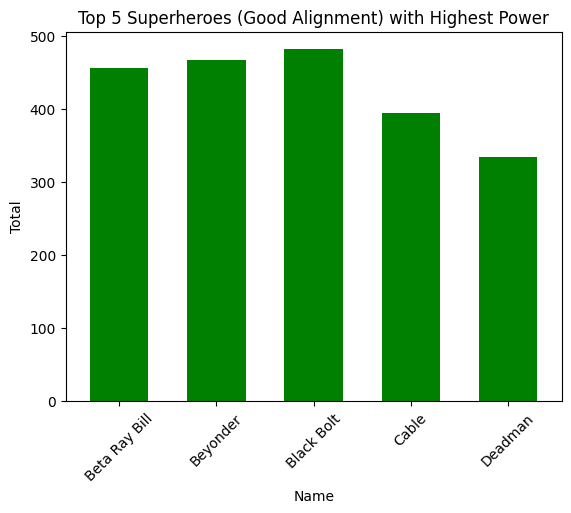

In [61]:
title = f'Top 5 Superheroes (Good Alignment) with Highest {power_column.title()}'

ax = first_five_records_max_power_heroes[[total_column]].plot.bar(color='green', rot=45, width=0.6, legend=None, xlabel=name_column.title(), ylabel=total_column.title(), title=title)

## 15. Extract villains who having a bad alignment
#### (Extract villains having bad alignment)

Return a subset of the dataframe where the alignment column's value is equal to "bad"

In [62]:
bad_alignment_villains = marvel_heroes_df.loc[marvel_heroes_df[alignment_column] == 'bad']

In [63]:
#force_show_all_rows(bad_alignment_villains)

## 16. Show first five records of point 15

Use the head function to show the first five records of the previously assigned dataframe

In [64]:
bad_alignment_villains.head()

alignment  intelligence  strength  speed  durability  power   
name                                                                      
Abomination       bad            63        80     53          90     55  \
Abraxas           bad            88       100     83          99    100   
Air-Walker        bad            50        85    100          85    100   
Amazo             bad            75       100    100         100    100   
Ammo              bad             1         1      1           1      0   

             combat  total  
name                        
Abomination      95    436  
Abraxas          56    526  
Air-Walker       40    460  
Amazo           100    575  
Ammo              1      5

## 17. Show top five fastest super villains in terms of super speed

Use the nlargest function to get the five largest rows based on the value of the "speed" column

In [65]:
bad_alignment_villains.nlargest(5, speed_column)

alignment  intelligence  strength  speed  durability  power   
name                                                                         
Air-Walker           bad            50        85    100          85    100  \
Amazo                bad            75       100    100         100    100   
Superboy-Prime       bad            94       100    100         100    100   
Zoom                 bad            50        10    100          28     72   
General Zod          bad            94       100     96         100     94   

                combat  total  
name                           
Air-Walker          40    460  
Amazo              100    575  
Superboy-Prime      85    579  
Zoom                28    288  
General Zod         95    579

## 18. Top five super villains in terms of intelligence

Find the column name that is equal to "intelligence" and assign it to a variable

In [66]:
columns_with_intelligence_string = [column for column in marvel_hero_columns if "intelligence" in column]
print(columns_with_intelligence_string)
intelligence_column = columns_with_intelligence_string[0]

['intelligence']


Use the nlargest function to get the five largest rows based on the value of the "intelligence" column

In [67]:
bad_alignment_villains.nlargest(5, intelligence_column)

alignment  intelligence  strength  speed  durability  power   
name                                                                          
Mister Mxyzptlk       bad           113        10     12          14    100  \
Apocalypse            bad           100       100     33         100    100   
Brainiac              bad           100        28     63          90     60   
Doctor Doom           bad           100        32     20         100     93   
Joker                 bad           100        10     12          56     22   

                 combat  total  
name                            
Mister Mxyzptlk      28    277  
Apocalypse           60    493  
Brainiac             75    416  
Doctor Doom          84    429  
Joker                90    290

## 19. Show who is most dangerous super villain after calculating their total (top 5 only)

Create a column named sum of attributes by summing all of the numeric columns sans "total" (I later realized it wasn't needed due to the total column)

Additionally, verified that the total column is accurately the sum of the attributes

In [68]:
bad_alignment_numeric_columns = list(bad_alignment_villains.select_dtypes('number').columns)
del bad_alignment_numeric_columns[bad_alignment_numeric_columns.index('total')]
bad_alignment_numeric_columns

['intelligence', 'strength', 'speed', 'durability', 'power', 'combat']

In [69]:
most_dangerous_villains = bad_alignment_villains[bad_alignment_numeric_columns].sum(axis=1, numeric_only=True).rename('sum_of_attributes')
most_dangerous_villains = most_dangerous_villains.to_frame()
compare_total_sum_of_attributes = bad_alignment_villains.join(most_dangerous_villains)
equality_of_total_sum_of_attributes = compare_total_sum_of_attributes['sum_of_attributes'].equals(compare_total_sum_of_attributes['total'])
equality_of_total_sum_of_attributes
most_dangerous_villains_df = most_dangerous_villains.nlargest(5, "sum_of_attributes")
most_dangerous_villains_df

sum_of_attributes
name                             
General Zod                   579
Superboy-Prime                579
Amazo                         575
Dormammu                      546
Doomsday                      545

Use the nlargest function to get the five largest rows based on the value of the "total" column

In [70]:
five_most_dangerous_villains = bad_alignment_villains.nlargest(5, 'total')
five_most_dangerous_villains

alignment  intelligence  strength  speed  durability  power   
name                                                                         
General Zod          bad            94       100     96         100     94  \
Superboy-Prime       bad            94       100    100         100    100   
Amazo                bad            75       100    100         100    100   
Dormammu             bad            88        95     83         100    100   
Doomsday             bad            88        80     67         120    100   

                combat  total  
name                           
General Zod         95    579  
Superboy-Prime      85    579  
Amazo              100    575  
Dormammu            80    546  
Doomsday            90    545

## 20. Draw a histogram for speed of super heroes having fig size (10,5), provide speed in histogram for only good alignment super heroes, title should be "distribution of speed", xlabel should be "speed"

Create a histogram from the dataframe of characters of good alignment, selecting the speed column and plotting a histogram with 30 bins.

Turn minor ticks on and set the X axis' label intervals to 5, and the Y axis' label intervals to 15.

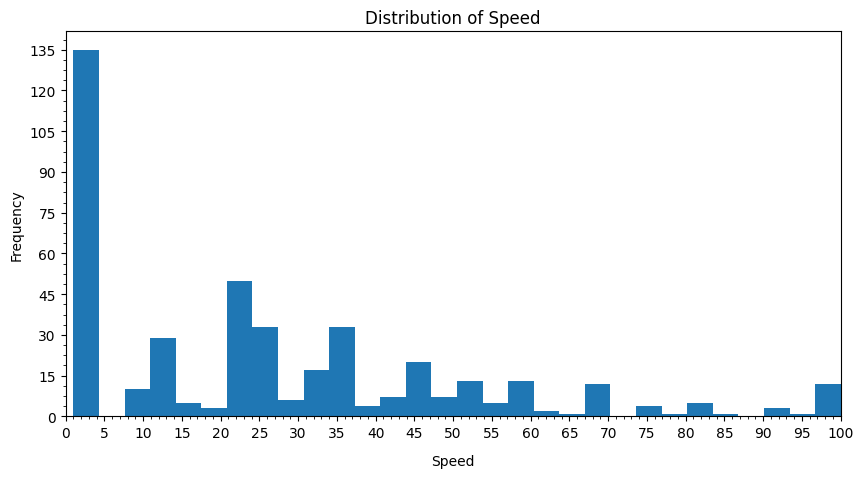

In [71]:
title = f'Distribution of {speed_column.title()}'

ax = good_alignment_heroes[[speed_column]].plot.hist(figsize=(10,5), bins=30, legend=None, title=title)
ax.minorticks_on()

ax.set_xlabel(speed_column.title(), labelpad=10)
ax.set_xlim(0, bad_alignment_villains[speed_column].max())

ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.yaxis.set_major_locator(ticker.MultipleLocator(15))

Histogram without including rows that only have a "total" value of 5 or less, if that data is due to an error in data gathering or recording

In [72]:
df_without_total_5_rows_good_align = df_without_total_5_rows.loc[df_without_total_5_rows['alignment'] == 'good']

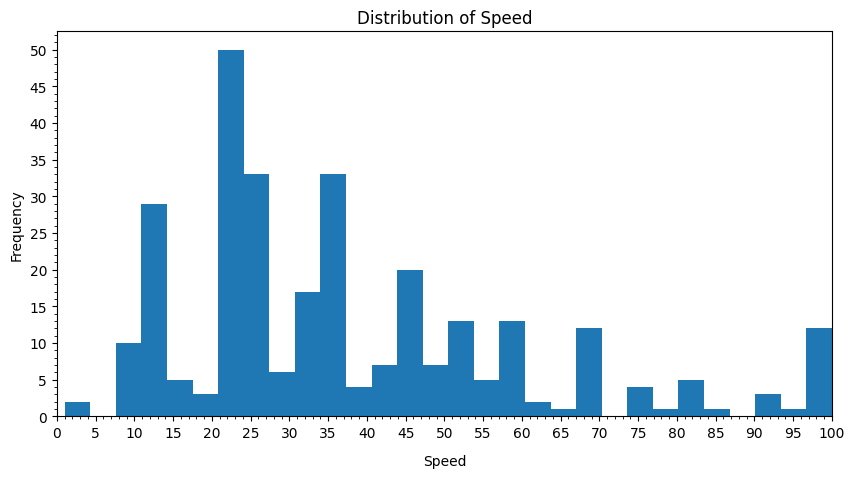

In [73]:
title = f'Distribution of {speed_column.title()}'

ax = df_without_total_5_rows_good_align[[speed_column]].plot.hist(figsize=(10,5), bins=30, legend=None, title=title)
ax.minorticks_on()

ax.set_xlabel(speed_column.title(), labelpad=10)
ax.set_xlim(0, bad_alignment_villains[speed_column].max())

ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.yaxis.set_major_locator(ticker.MultipleLocator(5))

## 21. Draw a histogram for combat of super villains having fig size (10,5), provide combat in histogram for only bad alignment super villains, title should be "distribution of combat", xlabel should be "combat"

Find column name equal to "combat" and assign it to a variable

In [74]:
columns_with_combat_string = [column for column in marvel_hero_columns if "combat" in column]
print(columns_with_combat_string)
combat_column = columns_with_combat_string[0]

['combat']


Create a histogram from the dataframe of characters of bad alignment, selecting the combat column and plotting a histogram with 30 bins.

Turn minor ticks on and set the X axis' label intervals to 5, and the Y axis' label intervals to 15.

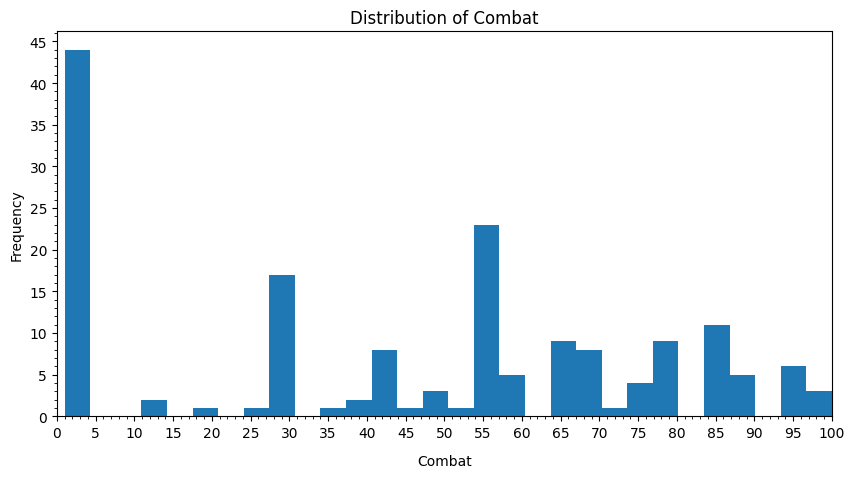

In [75]:
title = f'Distribution of {combat_column.title()}'

ax = bad_alignment_villains[[combat_column]].plot.hist(figsize=(10,5), bins=30, legend=None, title=title)
ax.minorticks_on()

ax.set_xlabel(combat_column.title(), labelpad=10)
ax.set_xlim(0, bad_alignment_villains[combat_column].max())

ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.yaxis.set_major_locator(ticker.MultipleLocator(5))

Histogram without including rows that only have a "total" value of 5 or less, if that data is due to an error in data gathering or recording

In [76]:
df_without_total_5_rows_bad_align = df_without_total_5_rows.loc[df_without_total_5_rows['alignment'] == 'bad']

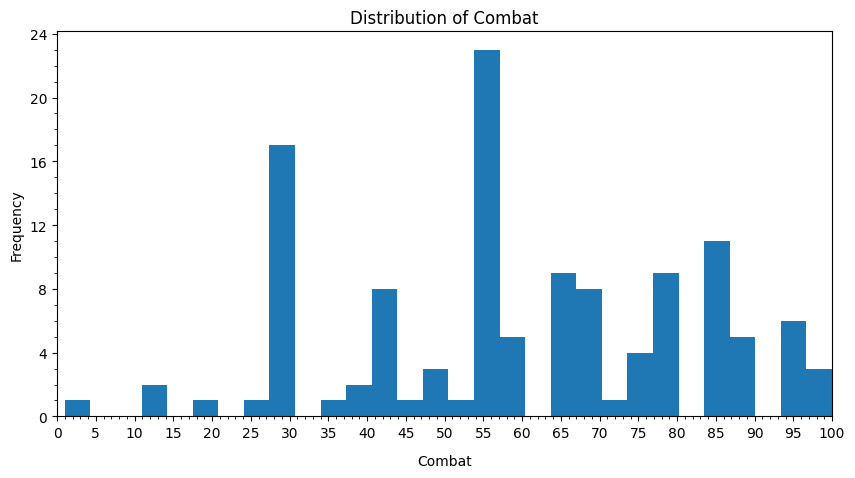

In [77]:
title = f'Distribution of {combat_column.title()}'

ax = df_without_total_5_rows_bad_align[[combat_column]].plot.hist(figsize=(10,5), bins=30, legend=None, title=title)
ax.minorticks_on()

ax.set_xlabel(combat_column.title(), labelpad=10)
ax.set_xlim(0, bad_alignment_villains[combat_column].max())

ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.yaxis.set_major_locator(ticker.MultipleLocator(4))

## 22-26. Data Discoveries and Visualizations

### 22. Minimum and Maximum Values

#### Characters with maximum value from any category

1. Create a dataframe from dropping the 'total' column from the original dataframe.
2. Find the max numeric value from the dataframe in step 1
3. Return a dataframe which contains rows containing the max value found in step 2 in any of the columns

In [78]:
marvel_heroes_without_total_col = df_without_total_5_rows.drop(columns=total_column)

max_value_in_dataframe = marvel_heroes_without_total_col.max(numeric_only=True).max()
print(max_value_in_dataframe)

dataframe_of_max_values = marvel_heroes_without_total_col[marvel_heroes_without_total_col.isin([max_value_in_dataframe]).any(axis=1)]
dataframe_of_max_values

120


alignment  intelligence  strength  speed  durability  power  combat
name                                                                        
Doomsday       bad            88        80     67         120    100      90

#### Characters with minimum value from any category

1. Create a dataframe from dropping the 'total' column from the original dataframe.
2. Find the minimum numeric value from the dataframe in step 1
3. Return a dataframe which contains rows containing the minimum value found in step 2 in any of the columns

In [79]:
marvel_heroes_without_total_col = df_without_total_5_rows.drop(columns=total_column)

min_value_in_dataframe = marvel_heroes_without_total_col.min(numeric_only=True).min()
print(min_value_in_dataframe)

dataframe_of_min_values = marvel_heroes_without_total_col[marvel_heroes_without_total_col.isin([min_value_in_dataframe]).any(axis=1)]
dataframe_of_min_values

0


alignment  intelligence  strength  speed  durability  power   
name                                                                         
Doctor Doom II       bad             1        32      1           1      0  \
Franklin Storm      good            38        10      1           1      0   

                combat  
name                    
Doctor Doom II       1  
Franklin Storm      10

### 23. Mix of Values Greater than and Below Average

Rows containing (Characters having) lower than 15th percentile intelligence and greater than 85th percentile power

Use the loc and quantile function to get a subset of the dataframe pertaining to the specifications in the above comment, followed by sorting the values in ascending order: first by intelligence, then by power.

In [80]:
df_without_total_5_rows.loc[(df_without_total_5_rows[intelligence_column] < df_without_total_5_rows[intelligence_column].quantile(0.15))
                     & (df_without_total_5_rows[power_column] > df_without_total_5_rows[power_column].quantile(0.85))].sort_values([intelligence_column, power_column])

alignment  intelligence  strength  speed  durability  power  combat   
name                                                                           
Kevin 11       bad            25         7     12          14    100      40  \

          total  
name             
Kevin 11    198

Rows containing (Characters having) higher than 85th percentile intelligence, lower than 15th percentile power

Use the loc and quantile function to get a subset of the dataframe pertaining to the specifications in the above comment, followed by sorting the values in ascending order: first by power, then by intelligence.

In [81]:
df_without_total_5_rows.loc[(df_without_total_5_rows[intelligence_column] > df_without_total_5_rows[intelligence_column].quantile(0.85))
                     & (df_without_total_5_rows[power_column] < df_without_total_5_rows[power_column].quantile(0.15))].sort_values([power_column, intelligence_column])

alignment  intelligence  strength  speed  durability  power   
name                                                                     
Lex Luthor       bad           100        10     12          14     10  \
Riddler          bad           100        10     12          14     10   
Tinkerer         bad           100        10     23          14     10   
Joker            bad           100        10     12          56     22   

            combat  total  
name                       
Lex Luthor      28    174  
Riddler         14    160  
Tinkerer        14    171  
Joker           90    290

Rows containing (Characters having) higher than 85th percentile intelligence, lower than 35th percentile power, strength and combat

Use the loc and quantile function to get a subset of the dataframe pertaining to the specifications in the above comment, followed by sorting the values in ascending order: first by power, then by strength, combat, and intelligence.

In [82]:
df_without_total_5_rows.loc[(df_without_total_5_rows[intelligence_column] > df_without_total_5_rows[intelligence_column].quantile(0.85))
                     & (df_without_total_5_rows[power_column] < df_without_total_5_rows[power_column].quantile(0.35)) & 
                     (df_without_total_5_rows['strength'] < df_without_total_5_rows['strength'].quantile(0.35)) &
                     (df_without_total_5_rows['combat'] < df_without_total_5_rows['combat'].quantile(0.35))].sort_values([power_column, 'strength', 'combat', intelligence_column])

alignment  intelligence  strength  speed  durability  power   
name                                                                     
Riddler          bad           100        10     12          14     10  \
Tinkerer         bad           100        10     23          14     10   
Lex Luthor       bad           100        10     12          14     10   
Ant-Man         good           100        10     23          28     32   

            combat  total  
name                       
Riddler         14    160  
Tinkerer        14    171  
Lex Luthor      28    174  
Ant-Man         32    225

Rows containing (Characters having) lower than 15th percentile strength, greater than 85th percentile durability

Use the loc and quantile function to get a subset of the dataframe pertaining to the specifications in the above comment, followed by sorting the values in ascending order: first by intelligence, then by power.

In [83]:
df_without_total_5_rows.loc[(df_without_total_5_rows['strength'] < df_without_total_5_rows['strength'].quantile(0.15))
                     & (df_without_total_5_rows['durability'] > df_without_total_5_rows['durability'].quantile(0.85))].sort_values([intelligence_column, power_column])

alignment  intelligence  strength  speed  durability  power   
name                                                                        
Claire Bennet      good            38         9     12         100     73  \

               combat  total  
name                          
Claire Bennet      28    260

### 24. Mix of Values Greater than Average

Rows containing (Characters having) speed equal to the 100th percentile and durability greater than the 85th percentile

Use the loc and quantile function to get a subset of the dataframe pertaining to the specifications in the above comment, followed by sorting the values by durability in descending order.

In [84]:
df_without_total_5_rows.loc[(df_without_total_5_rows['speed'] == df_without_total_5_rows['speed'].quantile(1))
                     & (df_without_total_5_rows['durability'] > df_without_total_5_rows['durability'].quantile(0.85))].sort_values('durability', ascending=False)

alignment  intelligence  strength  speed  durability  power   
name                                                                         
Stardust            good            88        85    100         110    100  \
Amazo                bad            75       100    100         100    100   
Bizarro          neutral            75        95    100         100     95   
Nova                good            38        60    100         100    100   
Superboy-Prime       bad            94       100    100         100    100   
Superman            good           100       100    100         100     94   

                combat  total  
name                           
Stardust            85    568  
Amazo              100    575  
Bizarro             85    550  
Nova                25    423  
Superboy-Prime      85    579  
Superman            85    579

Rows containing (Characters having) power, strength and combat greater than or equal to the 93rd percentile

Use the loc and quantile function to get a subset of the dataframe pertaining to the specifications in the above comment, followed by sorting the values in descending order: first by power, then by strength and combat.

In [85]:
df_without_total_5_rows.loc[(df_without_total_5_rows[power_column] >= df_without_total_5_rows[power_column].quantile(0.93)) & 
                     (df_without_total_5_rows['strength'] >= df_without_total_5_rows['strength'].quantile(0.93)) &
                     (df_without_total_5_rows['combat'] >= df_without_total_5_rows['combat'].quantile(0.93))].sort_values([power_column, 'strength', 'combat'], ascending=False)

alignment  intelligence  strength  speed  durability  power  combat   
name                                                                           
Amazo          bad            75       100    100         100    100     100  \
Goku          good            56       100     75          90    100     100   
Darkseid       bad            88       100     23         100    100      95   

          total  
name             
Amazo       575  
Goku        521  
Darkseid    506

### 25. Correlation of Attributes

#### Correlation Matrix

Overall correlation of numeric dataframe columns, excluding the "total" column (hence the dataframe variable used)

In [86]:
marvel_heroes_without_total_col.corr(numeric_only=True)

intelligence  strength     speed  durability     power    combat
intelligence      1.000000  0.225197  0.169220    0.215407  0.253997  0.315708
strength          0.225197  1.000000  0.444893    0.685430  0.412289  0.263509
speed             0.169220  0.444893  1.000000    0.448965  0.389612  0.147404
durability        0.215407  0.685430  0.448965    1.000000  0.480620  0.245203
power             0.253997  0.412289  0.389612    0.480620  1.000000  0.124730
combat            0.315708  0.263509  0.147404    0.245203  0.124730  1.000000

Correlation of numeric dataframe columns with the column "alignment" value of "good", excluding the "total" column (hence the dataframe variable used)

In [87]:
marvel_heroes_without_total_col.loc[marvel_heroes_without_total_col[alignment_column] == "good"].corr(numeric_only=True)

intelligence  strength     speed  durability     power    combat
intelligence      1.000000  0.239267  0.179644    0.245198  0.231621  0.371944
strength          0.239267  1.000000  0.397575    0.650788  0.333060  0.234907
speed             0.179644  0.397575  1.000000    0.401890  0.344297  0.088419
durability        0.245198  0.650788  0.401890    1.000000  0.442917  0.167187
power             0.231621  0.333060  0.344297    0.442917  1.000000  0.038380
combat            0.371944  0.234907  0.088419    0.167187  0.038380  1.000000

Correlation of numeric dataframe columns with the column "alignment" value of "bad", excluding the "total" column (hence the dataframe variable used)

In [88]:
marvel_heroes_without_total_col.loc[marvel_heroes_without_total_col[alignment_column] == "bad"].corr(numeric_only=True)

intelligence  strength     speed  durability     power    combat
intelligence      1.000000  0.148748  0.143931    0.136606  0.278319  0.197866
strength          0.148748  1.000000  0.533566    0.762968  0.549380  0.355751
speed             0.143931  0.533566  1.000000    0.540057  0.474127  0.287266
durability        0.136606  0.762968  0.540057    1.000000  0.526495  0.430809
power             0.278319  0.549380  0.474127    0.526495  1.000000  0.324487
combat            0.197866  0.355751  0.287266    0.430809  0.324487  1.000000

Correlation of numeric dataframe columns with the column "alignment" value of "neutral", excluding the "total" column (hence the dataframe variable used)

In [89]:
marvel_heroes_without_total_col.loc[marvel_heroes_without_total_col[alignment_column] == "neutral"].corr(numeric_only=True)

intelligence  strength     speed  durability     power    combat
intelligence      1.000000  0.325214  0.395395    0.054327  0.197442  0.502349
strength          0.325214  1.000000  0.736876    0.614554  0.622227  0.061302
speed             0.395395  0.736876  1.000000    0.524541  0.618824 -0.137611
durability        0.054327  0.614554  0.524541    1.000000  0.779326  0.078481
power             0.197442  0.622227  0.618824    0.779326  1.000000  0.160922
combat            0.502349  0.061302 -0.137611    0.078481  0.160922  1.000000

#### Pairplot connection of joint plots, excluding like-by-like plotting

1. Get a list of numeric columns to plot
2. Assign a palette for the "alignment" column
3. Assign a list of values from the "alignment" column
4. Create a for loop that iterates through each value in the list from step 1 twice, in order to create a plot matrix
    1. Don't plot like-by-like columns (if row != column)
    2. Make a joint plot using the original dataframe, the column values for the x and y, with a given hue and palette for the alignment column
    3. Add a kde plot to the joint plot
    4. Add a rugplot to the joint plot on the margins
5. Iterate through another for loop using a zip of the alignment columns and palette
    1. Plot a regplot to the joint plot (line of best fit), using the color-coordinates from the joint plot, and using the Axes object from the joint plot.

The shaded background around the regplot regression is the confidence interval of the linear regression model estimates

c:\Users\dSFSDf4353452SDFmb\mambaforge\lib\site-packages\seaborn\axisgrid.py:1690: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  f = plt.figure(figsize=(height, height))


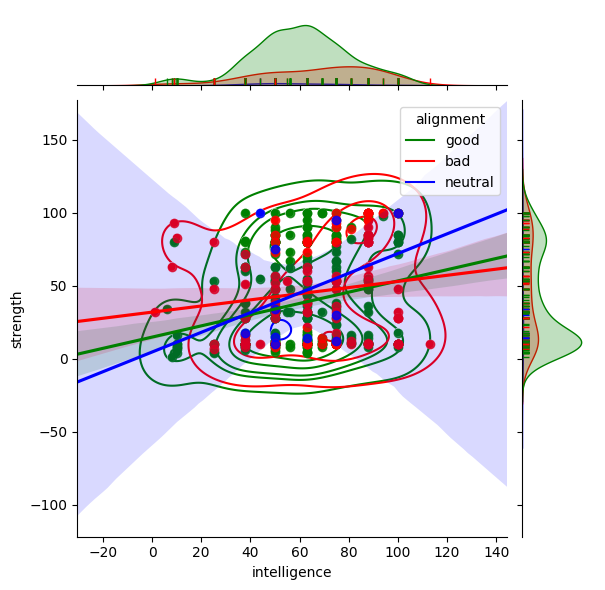

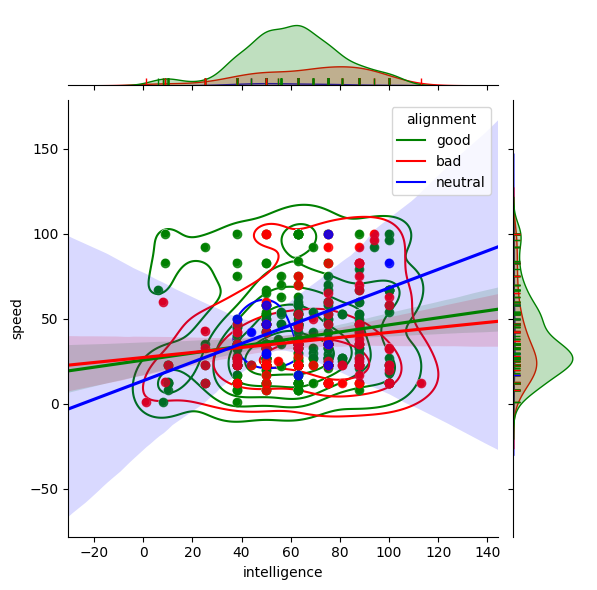

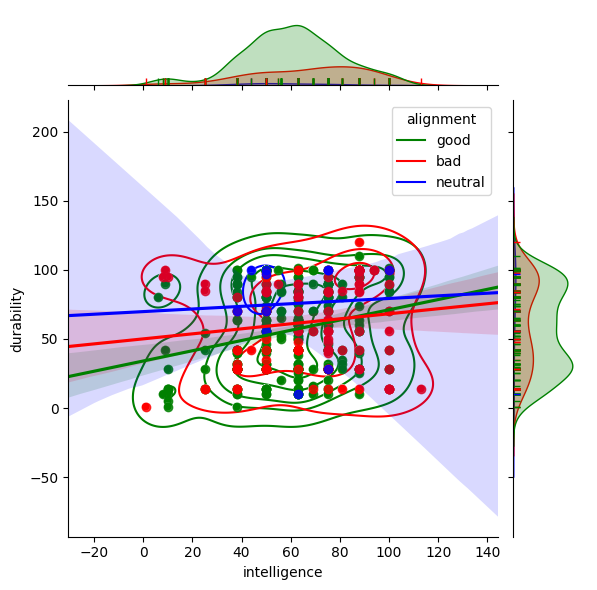

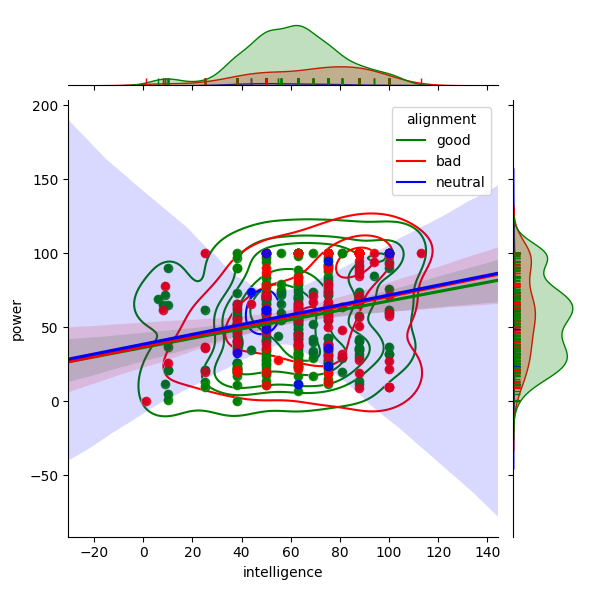

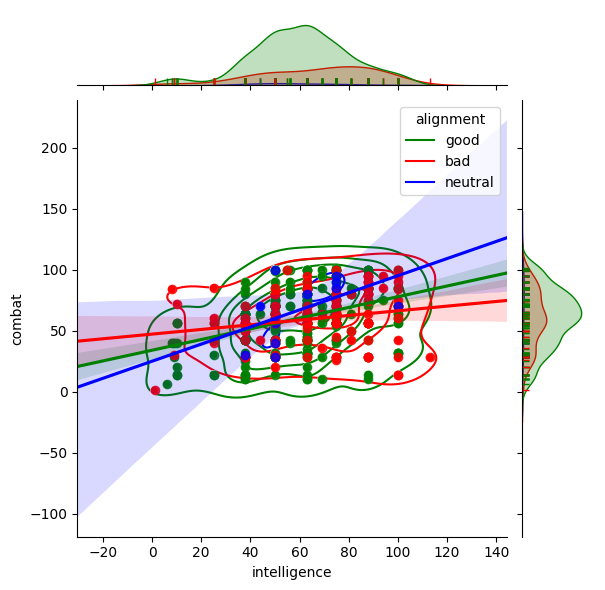

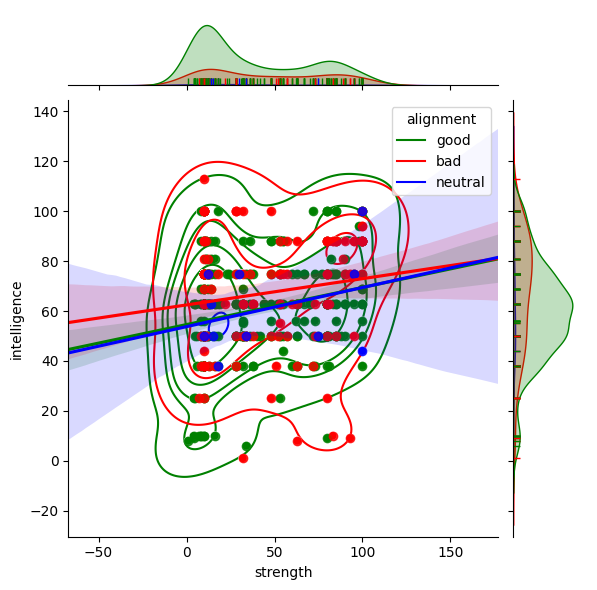

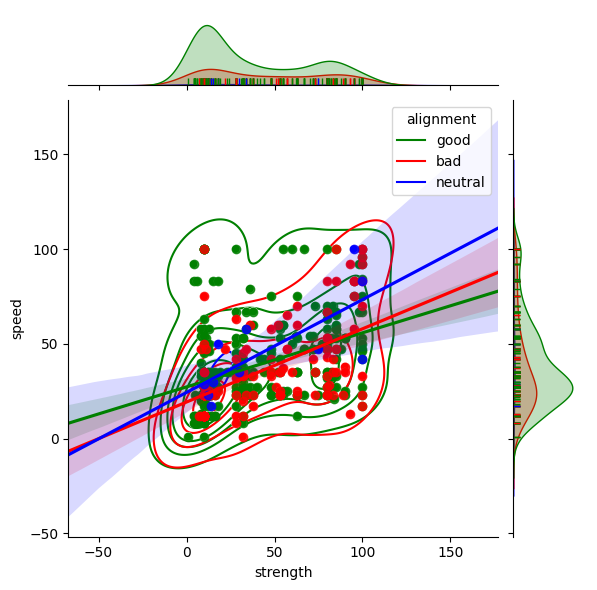

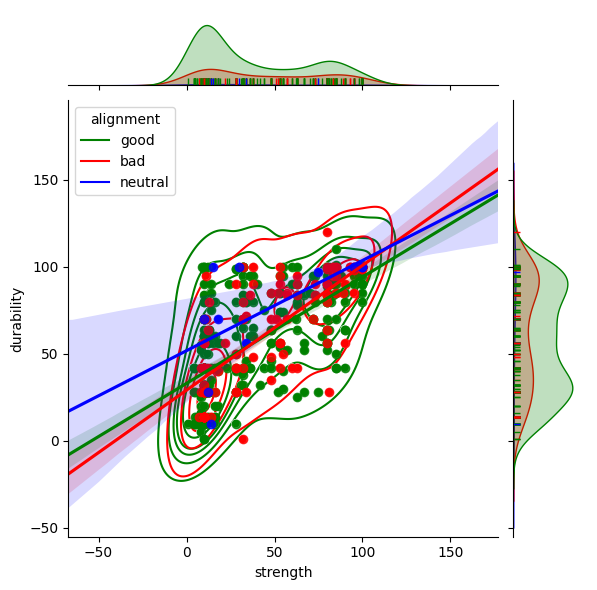

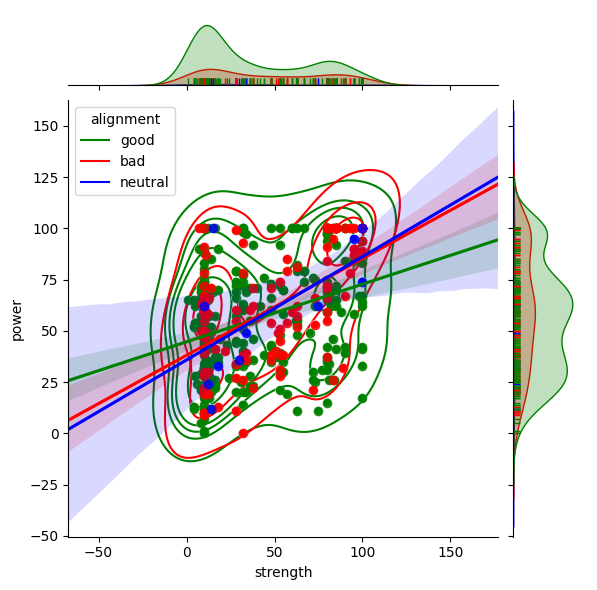

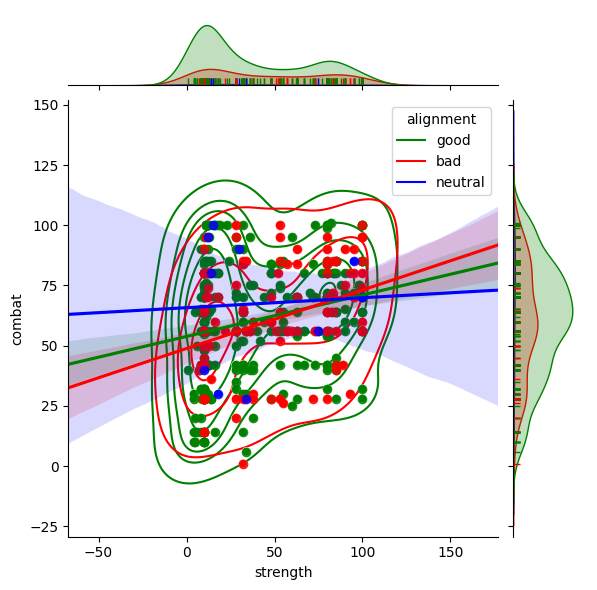

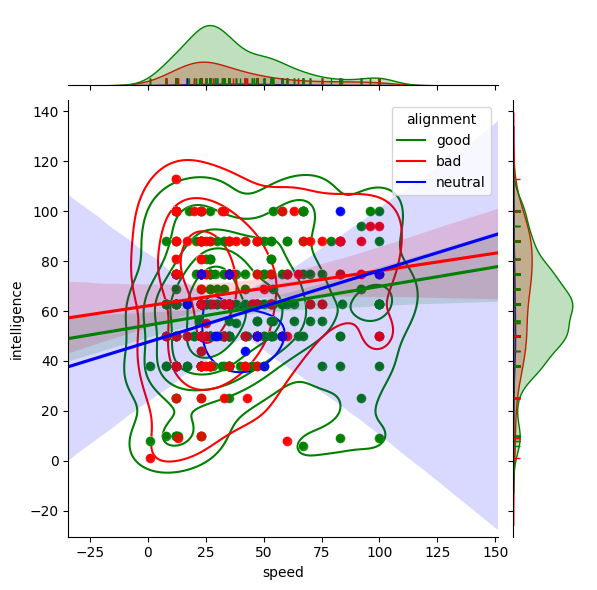

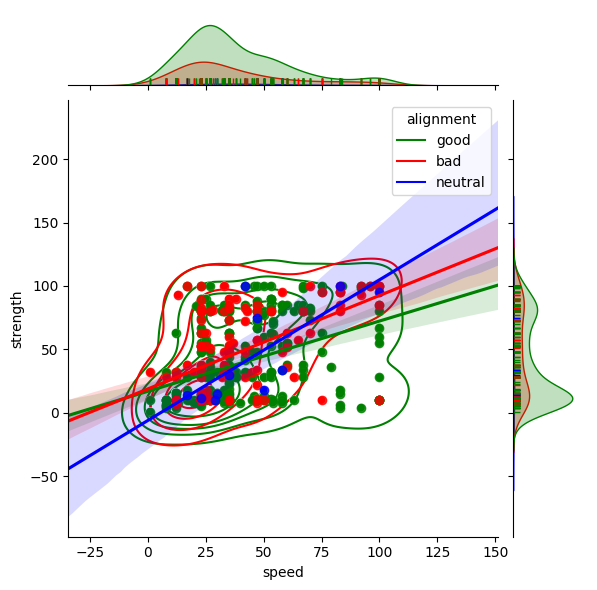

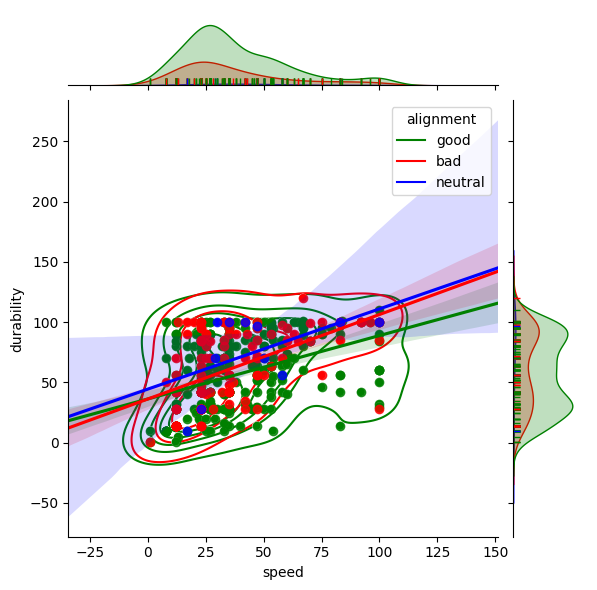

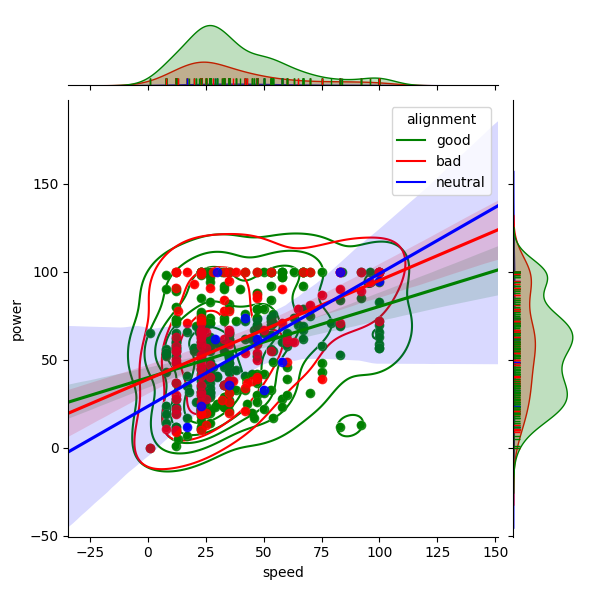

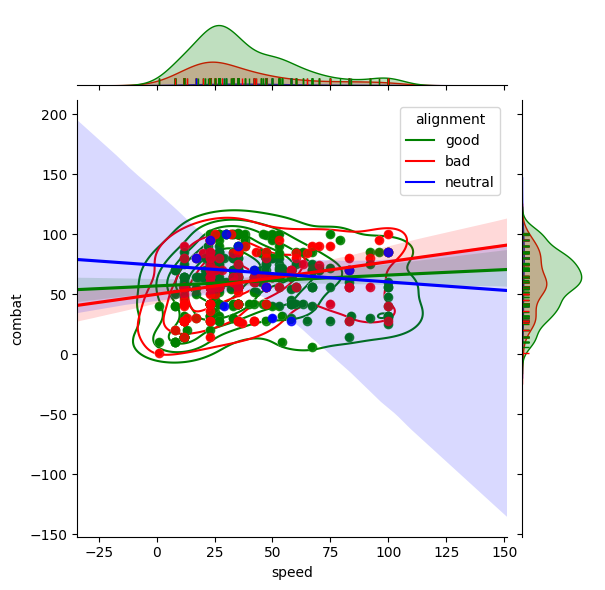

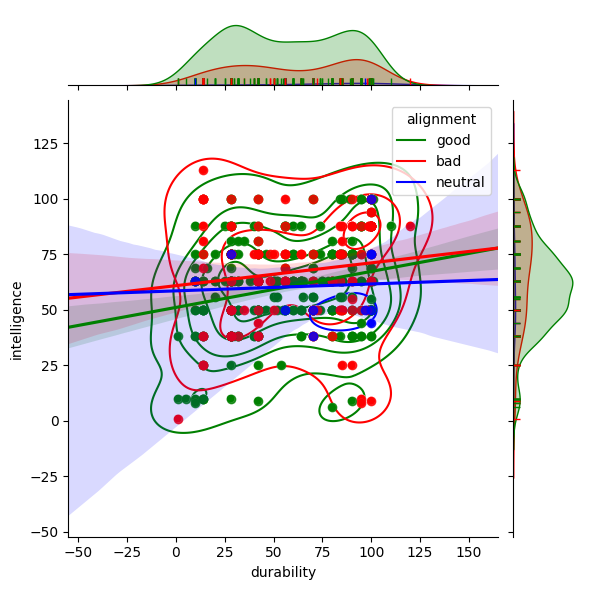

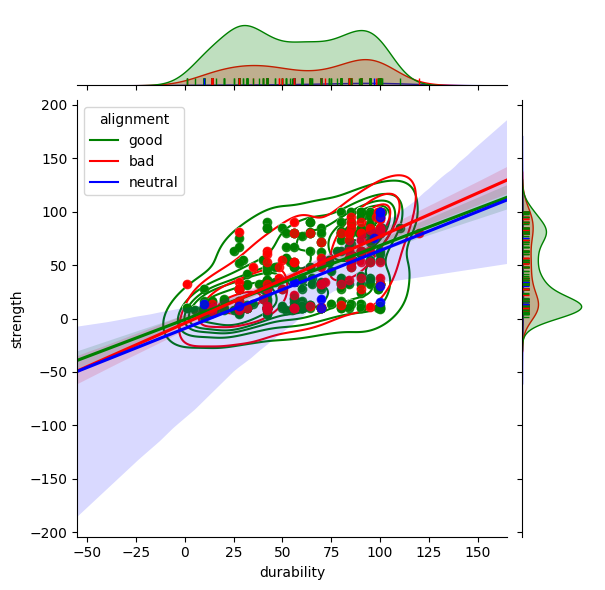

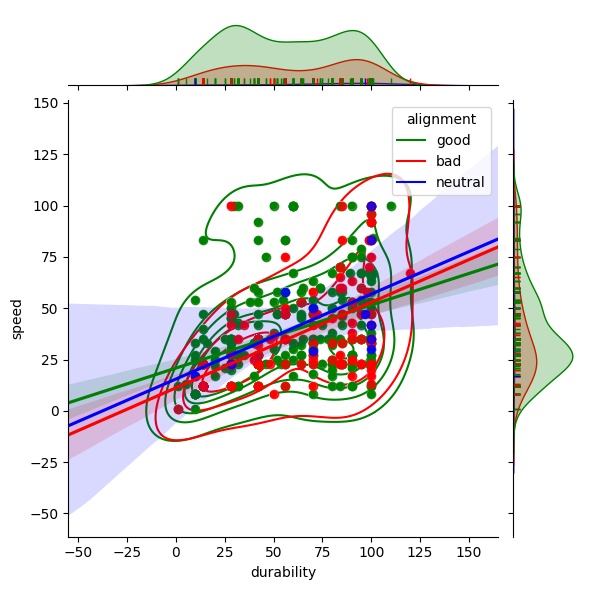

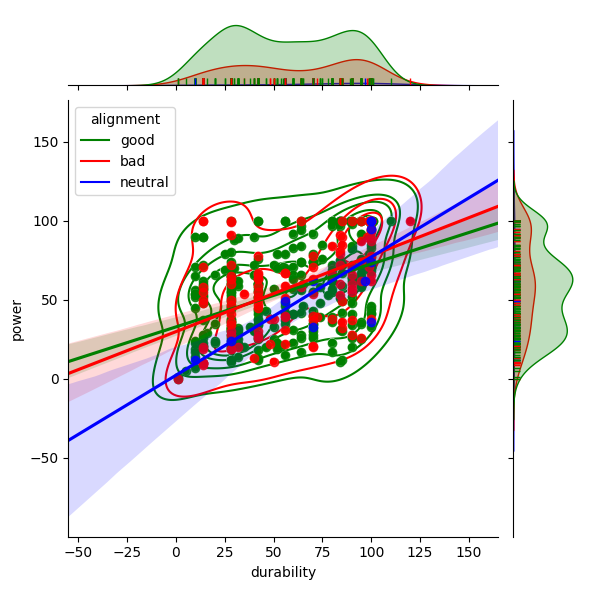

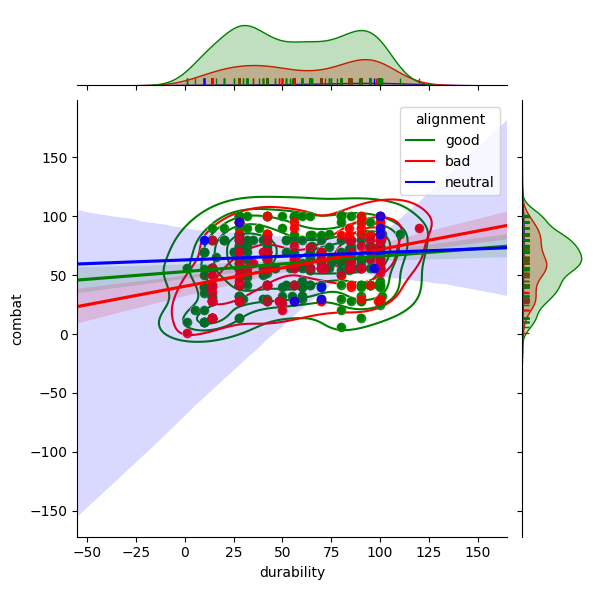

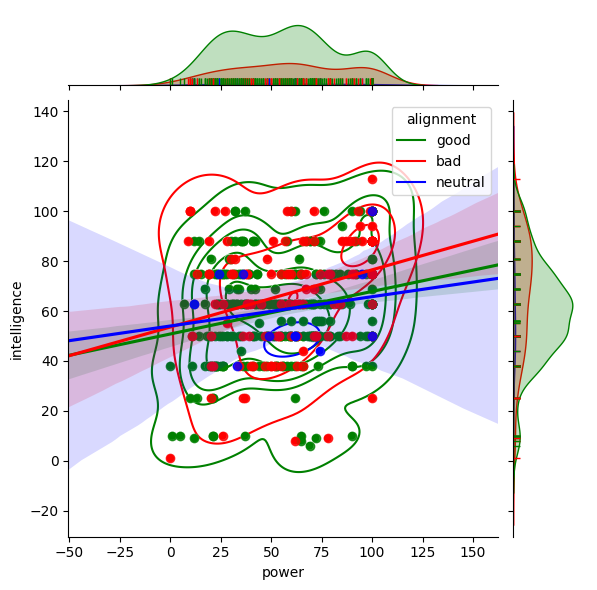

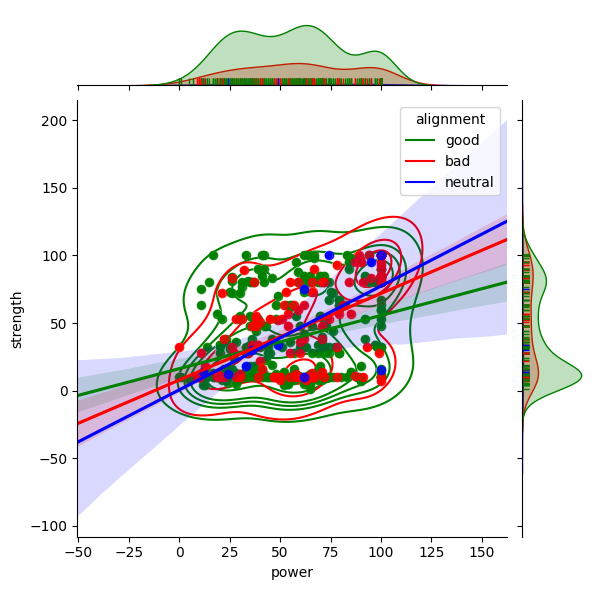

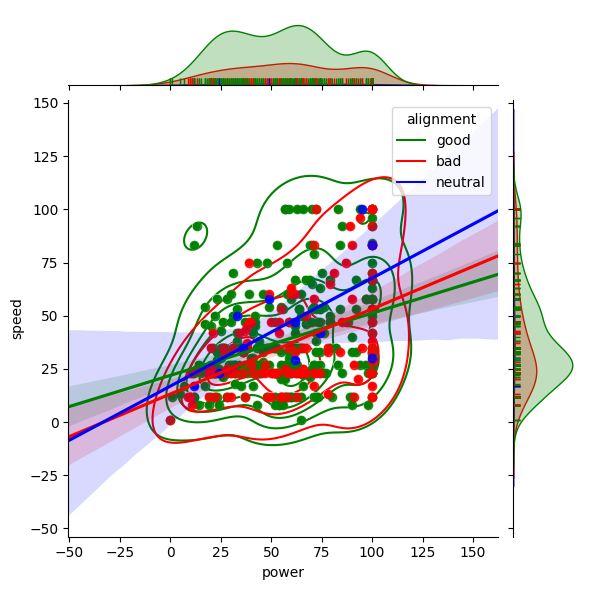

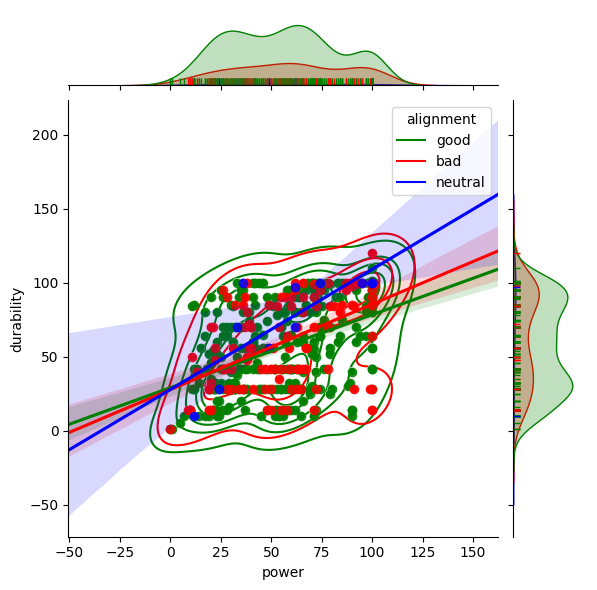

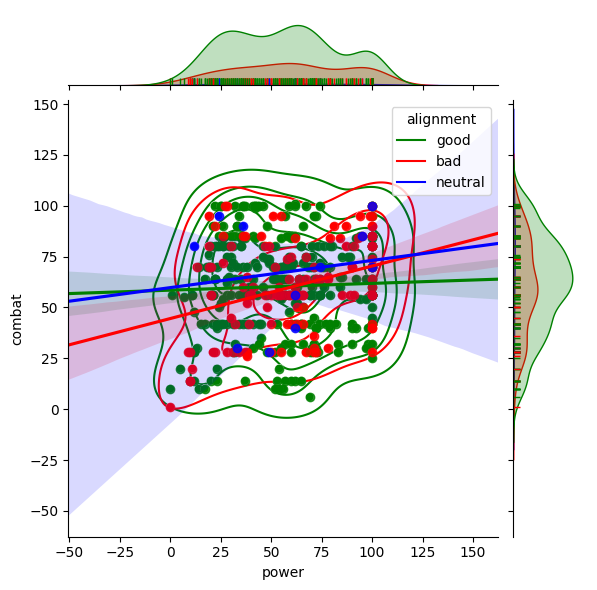

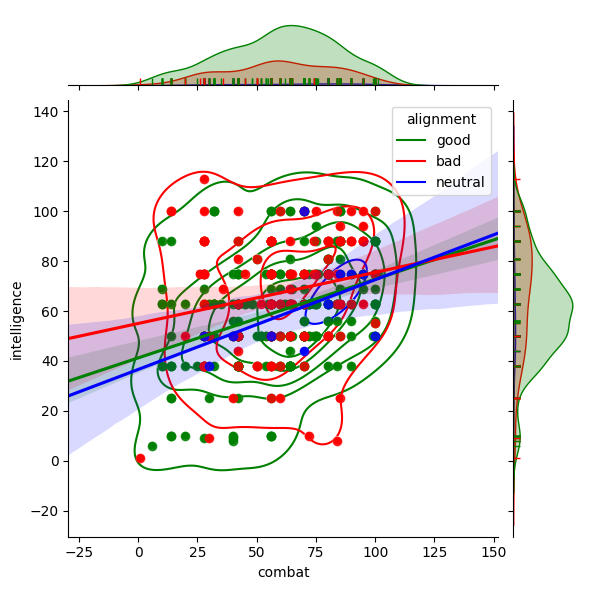

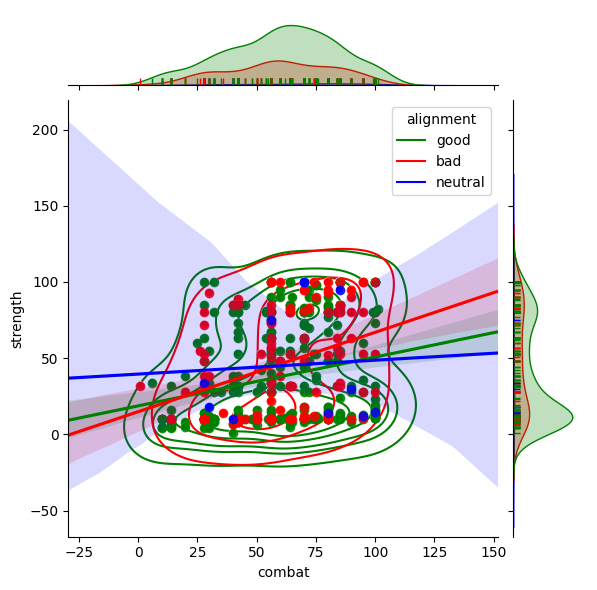

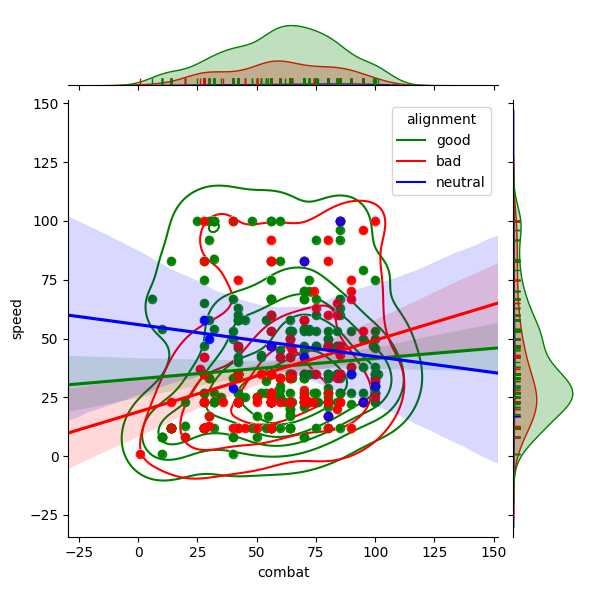

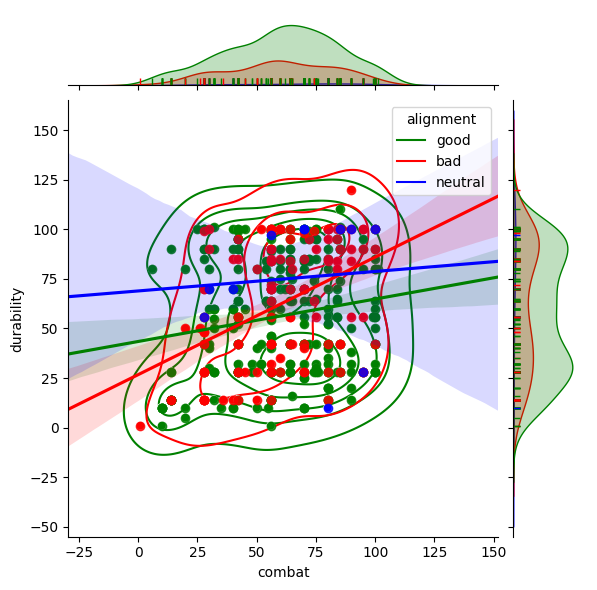

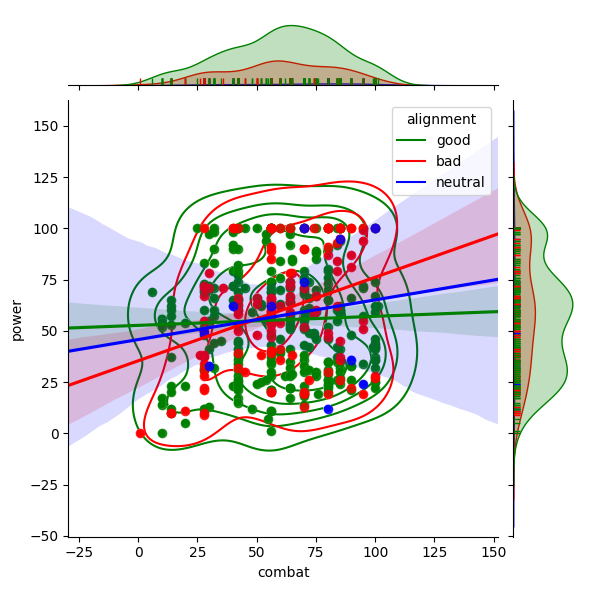

In [90]:
columns_to_plot = marvel_heroes_without_total_col.select_dtypes(include='number').columns.tolist()
# columns_to_plot.remove('strength')
# columns_to_plot.remove('speed')
# columns_to_plot.remove('durability')
# columns_to_plot.remove('power')

alignment_palette = ["green", "red", "blue"]
alignment_columns = ["good", "bad", "neutral"]

for row in columns_to_plot:
    for column in columns_to_plot:
        if row != column:
            g = sns.jointplot(data=df_without_total_5_rows, x=row, y=column, hue=alignment_column, hue_order=alignment_columns, palette=alignment_palette)
            g.plot_joint(sns.kdeplot, color="r", zorder=0, levels=6)
            g.plot_marginals(sns.rugplot, color="r", clip_on=False, height=0.1)
                
            for alignment_type, color in zip(alignment_columns, alignment_palette):
                sns.regplot(data=df_without_total_5_rows.loc[df_without_total_5_rows[alignment_column] == alignment_type], x=row, y=column, color=color, truncate=False, ax=g.ax_joint)

### 26. Tableau Visualizations (https://public.tableau.com/views/Marvel-DC-AnimeVisualization/Marvel-DC-AnimeAlignmentvsAbility?:language=en-US&:display_count=n&:origin=viz_share_link)